In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import re 
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import pandas as pd
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision
from sklearn.metrics import classification_report
from sklearn import preprocessing
import datetime
import sklearn
import torch.nn.functional as F
import torchvision.transforms.functional as TF

# Data load
(224,224,16)のnumpy配列

In [ ]:
#train data
cates_train = glob.glob("drive/MyDrive/sprit_data_fusion2/train/*")
print(cates_train)
all_data_train = []

data_train = []
cl_train = []
for cat in cates_train:
  name = glob.glob(cat + "/*")
  print(len(name))
  print(cat)
  for i in range(0, len(name)):
    filename = name[i]
    temp = np.load(filename)
    cl_train.append(temp)
    all_data_train.append(temp)
  data_train.append(cl_train)
  cl_train = []
print(type(np.array(all_data_train)))

#test data
cates_test = glob.glob("drive/MyDrive/sprit_data_fusion2/validation/*")
print(cates_test)
all_data_test = []

data_test = []
cl_test = []
for cat in cates_test:
  name = glob.glob(cat + "/*")
  print(len(name))
  print(cat)
  for i in range(0, len(name)):
    filename = name[i]
    temp = np.load(filename)
    cl_test.append(temp)
    all_data_test.append(temp)
  data_test.append(cl_test)
  cl_test = []
print(type(np.array(all_data_test)))

['drive/MyDrive/sprit_data_fusion2/train/brush_hair', 'drive/MyDrive/sprit_data_fusion2/train/run', 'drive/MyDrive/sprit_data_fusion2/train/clap', 'drive/MyDrive/sprit_data_fusion2/train/smoke']
76
drive/MyDrive/sprit_data_fusion2/train/brush_hair
176
drive/MyDrive/sprit_data_fusion2/train/run
97
drive/MyDrive/sprit_data_fusion2/train/clap
87
drive/MyDrive/sprit_data_fusion2/train/smoke
<class 'numpy.ndarray'>
['drive/MyDrive/sprit_data_fusion2/validation/brush_hair', 'drive/MyDrive/sprit_data_fusion2/validation/run', 'drive/MyDrive/sprit_data_fusion2/validation/smoke', 'drive/MyDrive/sprit_data_fusion2/validation/clap']
20
drive/MyDrive/sprit_data_fusion2/validation/brush_hair
45
drive/MyDrive/sprit_data_fusion2/validation/run
22
drive/MyDrive/sprit_data_fusion2/validation/smoke
24
drive/MyDrive/sprit_data_fusion2/validation/clap
<class 'numpy.ndarray'>


# ラベルの作成

In [ ]:
target = {
    "brush_hair" : 0,
    "smoke"      : 1,
    "run"        : 2,
    "clap"       : 3
}
import itertools

target_train= [[0]*76,[1]*176,[2]*97,[3]*87]
target_train = list(itertools.chain.from_iterable(target_train))
target_test = [[0]*20,[1]*45,[2]*24,[3]*22]
target_test = list(itertools.chain.from_iterable(target_test))

print(len(data_test[3]))
print(target_test.count(3))
all_data_test = list(itertools.chain.from_iterable(data_test))
  

22
22


# tesorに変換

In [ ]:
X_train = torch.stack([TF.to_tensor(i) for i in all_data_train])
Y_train = torch.stack([torch.from_numpy(np.array(i)) for i in target_train])
X_test  = torch.stack([TF.to_tensor(i) for i in all_data_test])
Y_test = torch.stack([torch.from_numpy(np.array(i)) for i in target_test])

In [ ]:
print(X_train.shape)
print(Y_train)
print(X_test.shape)
print(Y_test)
#nomalized_tensor_gray_image = TF.to_tensor(X_train)

torch.Size([436, 16, 224, 224])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        

# torchにload


In [ ]:
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True,num_workers=2)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=32,shuffle=True,num_workers=2)

# 単純なCNNモデル

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        # クラスの初期化
        super(CNN, self).__init__()

        # 画像を畳み込みを行うまで
        self.head = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(5, 5), stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(5, 5), stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # 畳み込みで得られたベクトルを出力層に順伝播させるまで
        self.tail = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 4)
        )

    def __call__(self, x):
        # 順伝播を計算する関数
        # :param x: 入力値
        h = self.head(x)
        h = h.view(-1, 320)
        h = self.tail(h)
        y = F.log_softmax(h)
        return y


In [ ]:
device=torch.device('cuda')
net2 = CNN().to(device)
net2.cuda()

CNN(
  (head): Sequential(
    (0): Conv2d(16, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (tail): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=4, bias=True)
  )
)

# ResNetモデル

In [ ]:
class Bottleneck(nn.Module):
    """
    Bottleneckを使用したresidual blockクラス
    """
    def __init__(self, indim, outdim, is_first_resblock=False):
        super(Bottleneck, self).__init__()
        self.is_dim_changed = (indim != outdim)
        # W, Hを小さくしてCを増やす際はstrideを2にする +
        # projection shortcutを使う様にセット
        if self.is_dim_changed:
            if is_first_resblock:
                # 最初のresblockは(W､ H)は変更しないのでstrideは1にする
                stride = 1
            else:
                stride = 2
            self.shortcut = nn.Conv2d(indim, outdim, 1, stride=stride)
        else:
            stride = 1
        
        dim_inter = int(outdim / 4)
        self.conv1 = nn.Conv2d(indim, dim_inter , 1)
        self.bn1 = nn.BatchNorm2d(dim_inter)
        self.conv2 = nn.Conv2d(dim_inter, dim_inter, 3,
                               stride=stride, padding=1)
        self.bn2 = nn.BatchNorm2d(dim_inter)
        self.conv3 = nn.Conv2d(dim_inter, outdim, 1)
        self.bn3 = nn.BatchNorm2d(outdim)
        self.relu = nn.ReLU(inplace=True)
        

    def forward(self, x):
        shortcut = x
  
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)
        
        # Projection shortcutの場合
        if self.is_dim_changed:
            shortcut = self.shortcut(x)

        out += shortcut
        out = self.relu(out)

        return out


class ResNet50(nn.Module):
    
    def __init__(self): 
          
        super(ResNet50, self).__init__()
        
        # Due to memory limitation, images will be resized on-the-fly.
        self.upsampler = nn.Upsample(size=(224, 224))

        # Prior block
        self.layer_1 = nn.Conv2d(16, 64, 7, padding=3, stride=2)
        self.bn_1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(2, 2)
        
        # Residual blocks
        self.resblock1 = Bottleneck(64, 256, True)
        self.resblock2 = Bottleneck(256, 256)
        self.resblock3 = Bottleneck(256, 256)
        self.resblock4 = Bottleneck(256, 512)
        self.resblock5 = Bottleneck(512, 512)
        self.resblock6 = Bottleneck(512, 512)
        self.resblock7 = Bottleneck(512, 512)
        self.resblock8 = Bottleneck(512, 1024)
        self.resblock9 = Bottleneck(1024, 1024)
        self.resblock10 =Bottleneck(1024, 1024)
        self.resblock11 =Bottleneck(1024, 1024)
        self.resblock12 =Bottleneck(1024, 1024)
        self.resblock13 =Bottleneck(1024, 1024)
        self.resblock14 =Bottleneck(1024, 2048)
        self.resblock15 =Bottleneck(2048, 2048)
        self.resblock16 =Bottleneck(2048, 2048)
        
        # Postreior Block
        self.glob_avg_pool = nn.AdaptiveAvgPool2d((1, 1))        
        self.fc = nn.Linear(2048, 4)

    def forward(self, x):
        x = self.upsampler(x)
        
        # Prior block
        x = self.relu(self.bn_1(self.layer_1(x)))
        x = self.pool(x)
        
        # Residual blocks
        x = self.resblock1(x)
        x = self.resblock2(x)
        x = self.resblock3(x)
        x = self.resblock4(x)
        x = self.resblock5(x)
        x = self.resblock6(x)
        x = self.resblock7(x)
        x = self.resblock8(x)
        x = self.resblock9(x)
        x = self.resblock10(x)
        x = self.resblock11(x)
        x = self.resblock12(x)
        x = self.resblock13(x)
        x = self.resblock14(x)
        x = self.resblock15(x)
        x = self.resblock16(x)
        
        # Postreior Block
        x = self.glob_avg_pool(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x)
        return x

In [ ]:
device=torch.device('cuda')
net = ResNet50().to(device)
net.cuda()

ResNet50(
  (upsampler): Upsample(size=(224, 224), mode=nearest)
  (layer_1): Conv2d(16, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (resblock1): Bottleneck(
    (shortcut): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (resblock2): Bottleneck(
    (conv1): Con

# parameter


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 学習

In [ ]:
# lossとaccuracyを格納
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

nb_epoch = 100

for epoch in range(nb_epoch):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0

    #train
    net.train()
    for i, (data, labels) in enumerate(train_loader):
      
      data, labels = data.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = net(data)
      loss = criterion(outputs, labels)
      train_loss += loss.item()
      train_acc += (outputs.max(1)[1] == labels).sum().item()
      loss.backward()
      optimizer.step()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)

    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    print ('Epoch [{}/{}], train_loss: {train_loss:.4f}, train_acc: {train_acc:.4f}' 
                   .format(epoch+1, nb_epoch, i+1,  train_loss=avg_train_loss, train_acc=avg_train_acc))
    #test
    net.eval()
    with torch.no_grad():
     for data, labels in test_loader:
      data = data.to(device)
      labels = labels.to(device)
      outputs = net(data)
      loss = criterion(outputs, labels)
      val_loss += loss.item()
      val_acc += (outputs.max(1)[1] == labels).sum().item()
    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_acc / len(test_loader.dataset)

    print ('Epoch [{}/{}], val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}' 
                   .format(epoch+1, nb_epoch, i+1,  val_loss=avg_val_loss, val_acc=avg_val_acc))
    
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)



Epoch [1/100], train_loss: 0.0789, train_acc: 0.3784
Epoch [1/100], val_loss: 20.4604, val_acc: 0.3874
Epoch [2/100], train_loss: 0.0413, train_acc: 0.4587
Epoch [2/100], val_loss: 0.0485, val_acc: 0.4505
Epoch [3/100], train_loss: 0.0417, train_acc: 0.4495
Epoch [3/100], val_loss: 0.0520, val_acc: 0.4414
Epoch [4/100], train_loss: 0.0405, train_acc: 0.4771
Epoch [4/100], val_loss: 0.0522, val_acc: 0.4505
Epoch [5/100], train_loss: 0.0418, train_acc: 0.4748
Epoch [5/100], val_loss: 0.0494, val_acc: 0.4505
Epoch [6/100], train_loss: 0.0387, train_acc: 0.4954
Epoch [6/100], val_loss: 0.0518, val_acc: 0.4955
Epoch [7/100], train_loss: 0.0392, train_acc: 0.5069
Epoch [7/100], val_loss: 0.0473, val_acc: 0.4865
Epoch [8/100], train_loss: 0.0364, train_acc: 0.5046
Epoch [8/100], val_loss: 0.0436, val_acc: 0.5045
Epoch [9/100], train_loss: 0.0350, train_acc: 0.5619
Epoch [9/100], val_loss: 0.0457, val_acc: 0.4505
Epoch [10/100], train_loss: 0.0352, train_acc: 0.5780
Epoch [10/100], val_loss: 0

KeyboardInterrupt: ignored

# lossを可視化

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(train_loss_list,label='train', lw=3, c='b')
plt.plot(val_loss_list,label='test',lw=3,c = 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ResNet')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

# accuracyを可視化

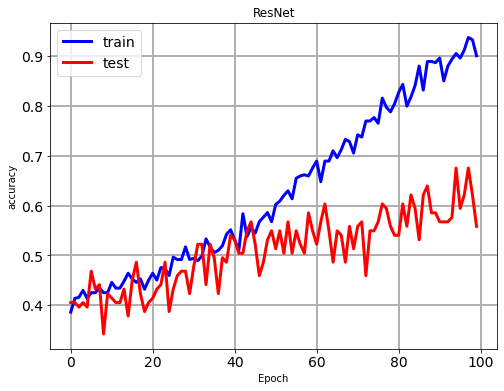

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(train_acc_list,label='train', lw=3, c='b')
plt.plot(val_acc_list,label='test',lw=3,c = 'r')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('ResNet')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()